In [1]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

**Importing the dataset**

In [4]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.drop(columns=['User ID','Gender'],inplace=True)

**Splitting the dataset into the Training set and Test set**

In [6]:
X=df.iloc[:,:-1].values
y=df['Purchased'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

**Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [10]:
y_pred_sqe=knn.predict(X_test)
knn.score(X_test,y_test)

0.9125

**Making the Confusion Matrix**

[[49  4]
 [ 3 24]]


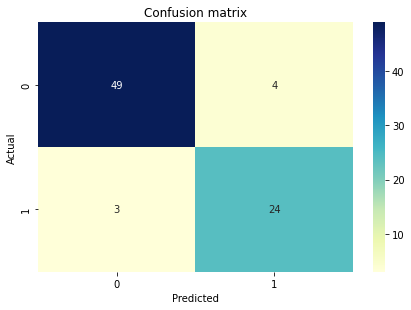

In [11]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, knn.predict(X_test))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print(cnf_matrix)